In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras .layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
df = pd.read_csv('GCV data.csv')

In [ ]:
df.head()

,CM,CA,Vm,FC,CC,CH,CS,CN,CO,qHe,GCV (experimental) (MJ/kg)
0,6.0,38.0,26.3,29.7,41.9,3.29,0.26,0.89,53.7,1.75,17.17
1,5.8,41.1,23.9,29.2,40.2,2.87,0.18,0.56,56.2,1.81,15.53
2,7.5,34.0,26.2,32.3,45.8,3.26,0.29,0.71,50.0,1.71,17.63
3,7.6,32.4,22.5,37.5,45.4,2.81,0.26,0.85,50.7,1.75,17.48
4,8.3,32.5,27.0,32.2,43.5,3.19,0.87,0.81,51.7,1.66,17.24


In [ ]:
df.tail()

,CM,CA,Vm,FC,CC,CH,CS,CN,CO,qHe,GCV (experimental) (MJ/kg)
74,7.1,29.0,28.1,35.8,50.4,3.1,1.5,1.1,43.9,1.52,20.90
75,5.7,37.5,23.2,33.6,43.1,2.6,1.0,1.1,52.2,1.59,17.33
76,8.9,35.9,23.2,32.0,42.0,2.3,2.2,1.0,52.5,1.64,16.41
77,5.5,40.1,24.2,30.2,42.0,2.4,0.7,1.0,53.9,1.68,16.85
78,5.1,46.5,20.8,27.6,35.6,2.0,0.5,0.8,61.1,1.78,13.91


In [ ]:
data_pa = df[['CM', 'CA', 'Vm', 'FC', 'CC', 'CH', 'CS', 'CN',
       'CO', 'qHe', 'GCV (experimental) (MJ/kg)']]
#data_pa = data_pa[['avg_outflow','TN','T', 'total_grid']]
X_data = data_pa.iloc[:, 0:10].values
y_data = data_pa.iloc[:, 10:11].values

In [ ]:
#PREPROCESSING DATA

#Normalization
min_max_scaler = MinMaxScaler(feature_range=(0,1))#this by default returns the value between 0-10.
X = min_max_scaler.fit_transform(X_data)
y = min_max_scaler.fit_transform(y_data)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , shuffle = True )

In [ ]:
# scaling outputs (1 column)
#Y_train = df_for_training.drop(['CM', 'CA', 'Vm','FC','CC','CH','CS','CN','CO','qHe'], axis=1)
#scaler_Y=MinMaxScaler(feature_range=(0,1))
#Y_train = scaler_Y.fit_transform(Y_train)
#Y_train.shape

In [ ]:
# PREVIOUS CODE
# scaler=MinMaxScaler(feature_range=(0,1))
# df_for_training_scaled = scaler.fit_transform(df_for_training)
# df_for_training_scaled.shape

In [ ]:
X_train_scaled = pd.DataFrame(X_train, columns=['CM', 'CA', 'Vm','FC','CC','CH','CS','CN','CO','qHe'])
Y_train_scaled = pd.DataFrame(y_train, columns=['GCV (experimental) (MJ/kg)'])
df_for_training_scaled = pd.concat([Y_train_scaled, X_train_scaled], axis=1)
# df_for_training_scaled
df_for_training_scaled = np.array(df_for_training_scaled)

In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 3
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 1:X_train.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (60, 3, 9).
trainY shape == (60, 1).


In [ ]:
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='tanh', return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             18944     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31393 (122.63 KB)
Trainable params: 31393 (122.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/100
14/14 [==============================] - 6s 71ms/step - loss: 0.2355 - val_loss: 0.0980
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0568 - val_loss: 0.0668
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0506 - val_loss: 0.0733
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0432 - val_loss: 0.0663
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0415 - val_loss: 0.0650
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0457 - val_loss: 0.0705
Epoch 7/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0381 - val_loss: 0.0665
Epoch 8/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0384 - val_loss: 0.0669
Epoch 9/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0376 - val_loss: 0.0704
Epoch 10/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0409 - val_loss: 0.0667
Epoch 11

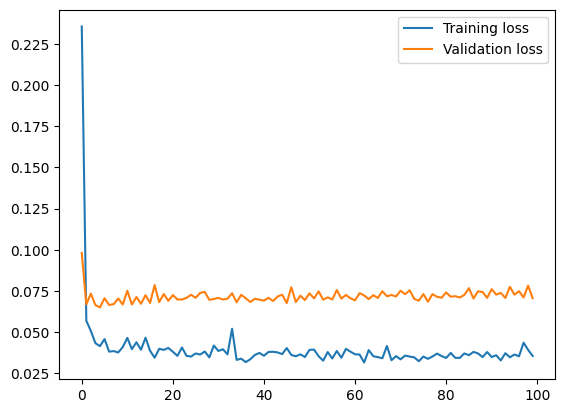

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
#df_for_test= df[['GCV (experimental) (MJ/kg)','CM','CA', 'Vm','FC','CC','CH','CS','CN','CO','qHe']]
#df_for_test=df_for_test.drop(df_for_test.index[0:63])
#print(df_for_test)

In [ ]:
# scaling inputs (columns)
#X_test = df_for_test.drop(['GCV (experimental) (MJ/kg)'], axis=1)
#X_test = scaler_X.fit_transform(X_test)
#X_test.shape

In [ ]:
# scaling outputs (1 column)
#Y_test = df_for_test.drop(['CM', 'CA', 'Vm','FC','CC','CH','CS','CN','CO','qHe'], axis=1)
#Y_test = scaler_Y.fit_transform(Y_test)
#Y_test.shape

In [ ]:
X_test_scaled = pd.DataFrame(X_test, columns=['CM', 'CA', 'Vm','FC','CC','CH','CS','CN','CO','qHe'])
Y_test_scaled = pd.DataFrame(y_test, columns=['GCV (experimental) (MJ/kg)'])
df_for_test_scaled = pd.concat([Y_test_scaled, X_test_scaled], axis=1)
# df_for_test_scaled
df_for_test_scaled = np.array(df_for_test_scaled)

In [ ]:
testX = []
testY = []
n_future = 1
n_past = 3
for i in range(n_past, len(df_for_test_scaled) - n_future +1):
    testX.append(df_for_test_scaled[i - n_past:i, 1:X_test.shape[1]])
    testY.append(df_for_test_scaled[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (13, 3, 9).
testY shape == (13, 1).


In [ ]:
train_predict=model.predict(trainX)
test_predict=model.predict(testX)

1/1 [==============================] - 0s 28ms/step


In [ ]:
train_predict_fin = min_max_scaler.inverse_transform(train_predict)
test_predict_fin = min_max_scaler.inverse_transform(test_predict)

In [ ]:
# prediction_copies_train = np.repeat(train_predict, df_for_training.shape[1], axis=1)
# train_predict= scaler.inverse_transform(prediction_copies_train)[:,0]

In [ ]:
train_predict_fin.shape

(60, 1)

In [ ]:
# prediction_copies_test = np.repeat(test_predict, df_for_training.shape[1], axis=-1)
# test_predict= scaler.inverse_transform(prediction_copies_test)[:,0]

In [ ]:
test_predict_fin

array([[18.31728 ],
       [18.612131],
       [19.497108],
       [20.149311],
       [19.274363],
       [18.765732],
       [18.661385],
       [19.2998  ],
       [19.147255],
       [18.212872],
       [17.874449],
       [18.2848  ],
       [18.98675 ]], dtype=float32)

In [ ]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(np.sqrt(mean_squared_error(trainY,train_predict_fin)))
x= np.squeeze(trainY)
x.shape
y=np.squeeze(train_predict_fin)
y.shape
mymodel = np.poly1d(np.polyfit(x, y, 10))
print(r2_score(y, mymodel(x)))

18.505105876609445
0.25289396511313544


In [ ]:
print((mean_absolute_error(testY,test_predict_fin)))
print(math.sqrt(mean_squared_error(testY,test_predict_fin)))
x= np.squeeze(testY)
x.shape
y=np.squeeze(test_predict_fin)
y.shape
mymodel = np.poly1d(np.polyfit(x, y, 10))
print(r2_score(y, mymodel(x)))


18.3589703777318
18.368567422015175
0.9877056574606208


In [ ]:
  print('root_mean_squared error of is==',np.sqrt(mean_squared_error(testY,test_predict_fin)))

root_mean_squared error of is== 18.368567422015175


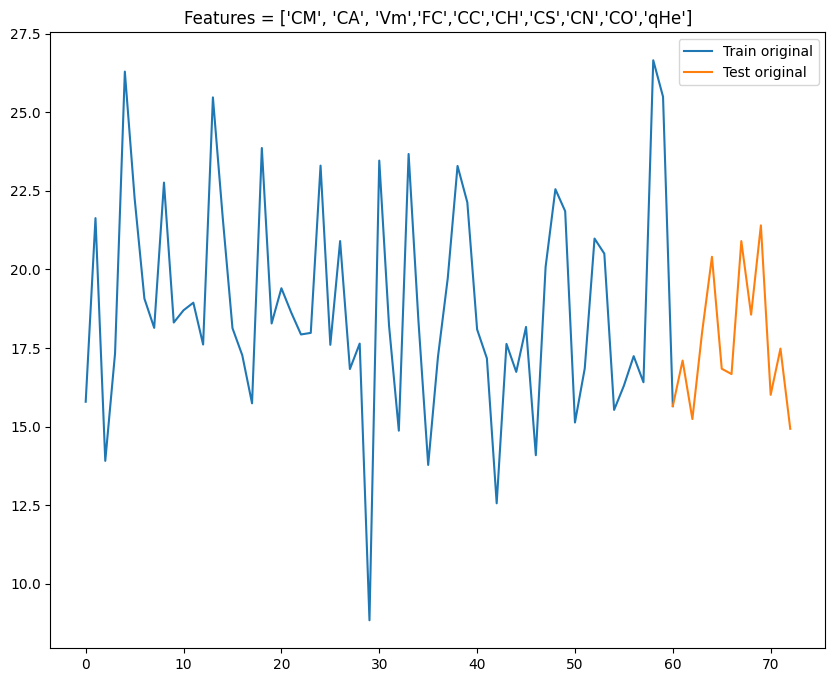

In [ ]:
plt.figure(figsize=(10,8))
combined_original = np.concatenate((min_max_scaler.inverse_transform(trainY),min_max_scaler.inverse_transform(testY)))
combined_original = pd.DataFrame(combined_original)
plt.plot(combined_original.iloc[:61], label="Train original")
plt.plot(combined_original.iloc[60:], label="Test original")
plt.title("Features = ['CM', 'CA', 'Vm','FC','CC','CH','CS','CN','CO','qHe']")
plt.legend()
plt.savefig("Model1 Original.png")

In [ ]:
# Y_train, Y_test, Y_train_pred, Y_test_pred
# trainY.shape -> 60, 1 (0.3008596, [0.66246418])
# testY.shape -> 9, 1 (0.08006279, 0)

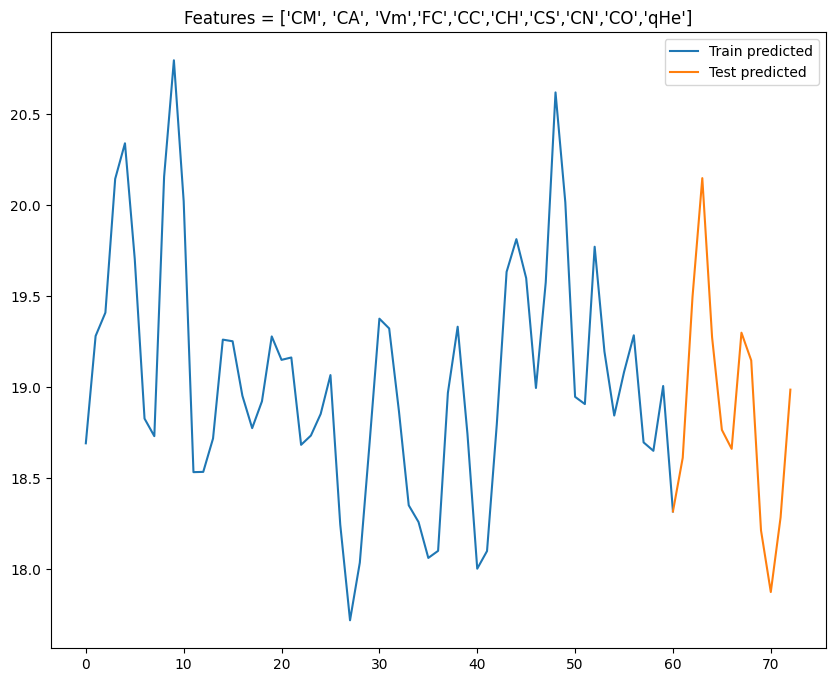

In [ ]:
plt.figure(figsize=(10,8))
combined_predicted = np.concatenate((train_predict_fin,test_predict_fin))
combined_predicted = pd.DataFrame(combined_predicted)
plt.plot(combined_predicted.iloc[:61], label="Train predicted")
plt.plot(combined_predicted.iloc[60:], label="Test predicted")
plt.title("Features = ['CM', 'CA', 'Vm','FC','CC','CH','CS','CN','CO','qHe']")
plt.legend()
plt.savefig("Model1 Predicted.png")